<a href="https://colab.research.google.com/github/SaileshP97/Machine-Learning-Projects/blob/main/Cat%20Dog%20Classification/cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
pip install kaggle

In [11]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
cp kaggle.json ~/.kaggle/

In [13]:
! chmod 600 ~/.kaggle/kaggle.json

In [14]:
! kaggle datasets download -d tongpython/cat-and-dog

 98% 213M/218M [00:01<00:00, 156MB/s]
100% 218M/218M [00:01<00:00, 145MB/s]


In [15]:
import shutil
shutil.unpack_archive("cat-and-dog.zip", "/content/")

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.layers import MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras import Sequential

In [ ]:
/content/training_set/training_set

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/training_set/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/test_set/test_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2023 images belonging to 2 classes.


#### Pre trained model

In [20]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

inputs = tf.keras.Input(shape=(224, 224, 3))
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=inputs)
for layer in base_model.layers:
    layer.trainable = False

87924736/87910968 [==============================] - 1s 0us/step


In [21]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 34,910,497
Trainable params: 13,107,713
Non-trainable params: 21,802,784
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [23]:
history = model.fit(training_set, batch_size=32, epochs=8, validation_data=test_set)

Epoch 1/8
251/251 [==============================] - 130s 465ms/step - loss: 0.9328 - accuracy: 0.9653 - val_loss: 0.1748 - val_accuracy: 0.9862
Epoch 2/8
251/251 [==============================] - 115s 456ms/step - loss: 0.1910 - accuracy: 0.9843 - val_loss: 0.1142 - val_accuracy: 0.9901
Epoch 3/8
251/251 [==============================] - 115s 458ms/step - loss: 0.0925 - accuracy: 0.9856 - val_loss: 0.0967 - val_accuracy: 0.9896
Epoch 4/8
251/251 [==============================] - 115s 457ms/step - loss: 0.0457 - accuracy: 0.9891 - val_loss: 0.1336 - val_accuracy: 0.9698
Epoch 5/8
251/251 [==============================] - 114s 453ms/step - loss: 0.0375 - accuracy: 0.9901 - val_loss: 0.0418 - val_accuracy: 0.9896
Epoch 6/8
251/251 [==============================] - 115s 456ms/step - loss: 0.0161 - accuracy: 0.9934 - val_loss: 0.0480 - val_accuracy: 0.9876
Epoch 7/8
251/251 [==============================] - 115s 457ms/step - loss: 0.0238 - accuracy: 0.9919 - val_loss: 0.0413 - val_ac

In [30]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [24]:
import matplotlib.pyplot as plt

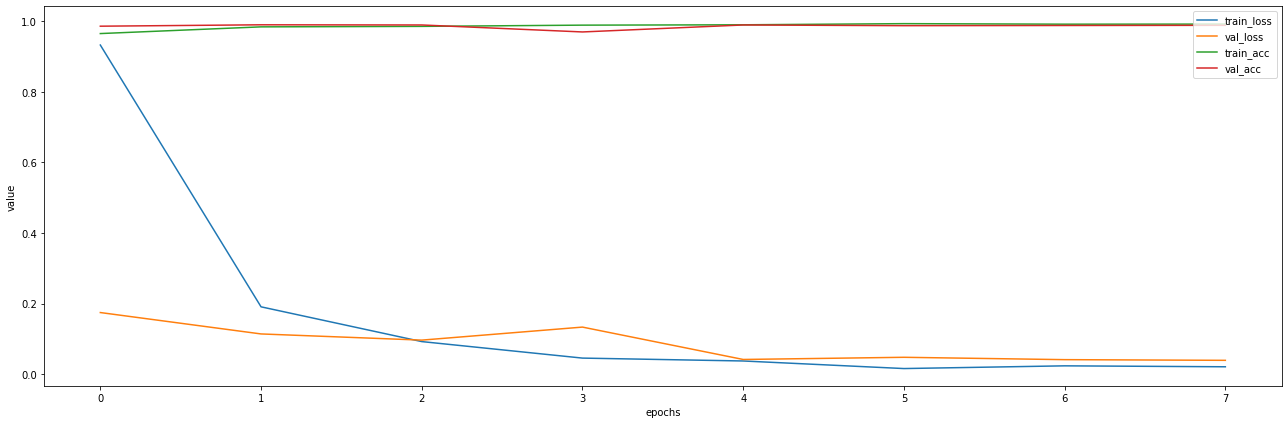

In [31]:
plt.figure(figsize=(18,6))
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.plot(train_acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.xlabel('epochs')
plt.ylabel('value')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()